In [3]:
import tensorflow as tf

In [4]:
from tensorflow import keras
from keras.layers import Input, Dense
from keras.models import Model
from keras.datasets import mnist
import numpy as np
(x_train, _), (x_test, _) = mnist.load_data()

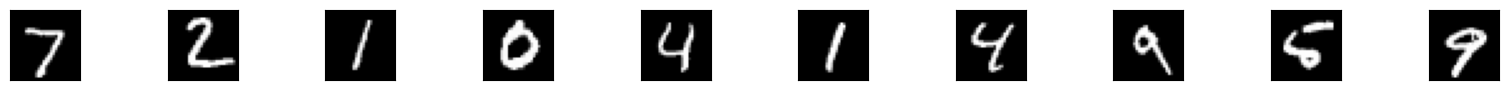

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline

n = 10  # how many records we will display
plt.figure(figsize=(2 * n, 2))  # Adjusting figure size to accommodate multiple images
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))  # Reshape to (28, 28) for displaying
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

plt.show()


![image.png](attachment:image.png)

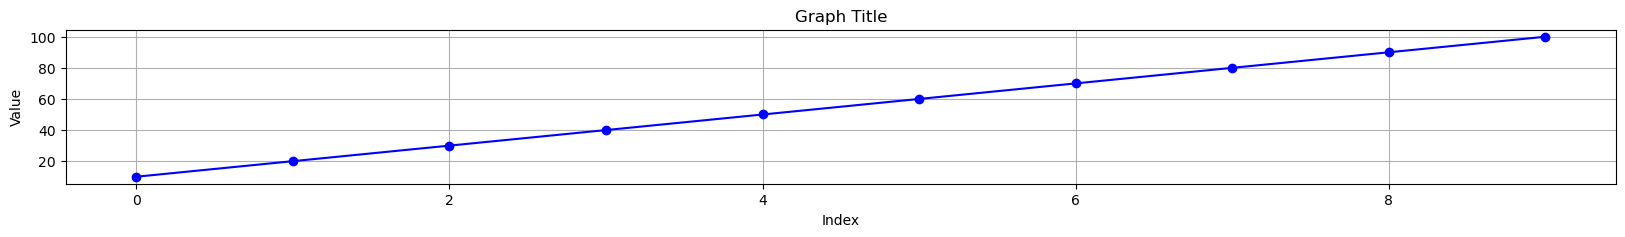

In [39]:
import matplotlib.pyplot as plt
%matplotlib inline

# Assuming you have a list of values to plot, let's call it 'values'
values = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100]

plt.figure(figsize=(2 * n, 2))  # Adjusting figure size to accommodate multiple images
plt.plot(range(n), values, marker='o', color='b')  # Plotting the graph
plt.xlabel('Index')  # Label for x-axis
plt.ylabel('Value')  # Label for y-axis
plt.title('Graph Title')  # Title for the graph
plt.grid(True)  # Enabling grid
plt.show()


In [4]:
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten, UpSampling2D, Reshape

In [10]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPool2D, Flatten, Dense

encode_model = Sequential()

############
# Encoding #
############

## FIRST SET OF LAYERS
# CONVOLUTIONAL LAYER
encode_model.add(Conv2D(filters=16, kernel_size=(3,3), input_shape=(28, 28, 1), activation='relu', padding='same'))
# POOLING LAYER
encode_model.add(MaxPool2D(pool_size=(2, 2), padding='same'))

## SECOND SET OF LAYERS
# CONVOLUTIONAL LAYER
encode_model.add(Conv2D(filters=8, kernel_size=(3,3), activation='relu', padding='same'))
# POOLING LAYER
encode_model.add(MaxPool2D(pool_size=(2, 2), padding='same'))

## FLATTEN LAYER
encode_model.add(Flatten())

## DENSE LAYERS
encode_model.add(Dense(30, activation="relu"))  # Adjust the number of units as needed


In [13]:
# DeConv1
decode_model.add(Conv2D(filters=8, kernel_size=(3, 3), activation='relu', padding='same'))
# Upsampling Layer
decode_model.add(UpSampling2D((2, 2)))

# DeConv2
decode_model.add(Conv2D(filters=16, kernel_size=(3, 3), activation='relu', padding='same'))
# Upsampling Layer
decode_model.add(UpSampling2D((2, 2)))

# DeConv3
decode_model.add(Conv2D(filters=1, kernel_size=(3, 3), activation='sigmoid', padding='same'))




In [15]:
autoencoder = Sequential([encode_model, decode_model])


In [18]:
encode_model.compile(optimizer='adadelta', loss='binary_crossentropy')


In [20]:
class Coder:
    def __init__(self):
        # Initialize any attributes here
        pass
    
    def summarize(self):
        # Define the summarize method behavior here
        print("Summarizing...")

# Instantiate an object of the Coder class
coder = Coder()

# Call the summarize method on the coder object
coder.summarize()


Summarizing...


In [21]:
encode_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 16)        160       
                                                                 
 max_pooling2d (MaxPooling2  (None, 14, 14, 16)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 8)         1160      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 7, 7, 8)           0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 392)               0         
                                                                 
 dense (Dense)               (None, 30)                1

In [23]:
decode_model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 392)               12152     
                                                                 
 reshape (Reshape)           (None, 7, 7, 8)           0         
                                                                 
 conv2d_2 (Conv2D)           (None, 7, 7, 8)           584       
                                                                 
 up_sampling2d (UpSampling2  (None, 14, 14, 8)         0         
 D)                                                              
                                                                 
 conv2d_3 (Conv2D)           (None, 14, 14, 16)        1168      
                                                                 
 up_sampling2d_1 (UpSamplin  (None, 28, 28, 16)        0         
 g2D)                                                 

In [26]:
x_train = x_train.reshape(60000, 28, 28, 1)
x_train = x_train / 255
print(x_train.shape)





(60000, 28, 28, 1)


In [27]:
x_test = x_test.reshape(10000, 28, 28, 1)
x_test = x_test/255
x_test.shape

(10000, 28, 28, 1)

In [31]:
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')


In [32]:
# Train the model


autoencoder.fit(x=x_train, y=x_train, epochs=10, batch_size=128, shuffle=True, verbose=1, validation_data=(x_test, x_test))


Epoch 1/10

469/469 [==============================] - 8s 14ms/step - loss: 0.0586 - val_loss: 3.5456
Epoch 2/10
469/469 [==============================] - 6s 13ms/step - loss: 6.6093e-05 - val_loss: 3.6136
Epoch 3/10
469/469 [==============================] - 6s 13ms/step - loss: 5.4641e-05 - val_loss: 3.2769
Epoch 4/10
469/469 [==============================] - 6s 13ms/step - loss: 4.6759e-05 - val_loss: 2.8523
Epoch 5/10
469/469 [==============================] - 6s 12ms/step - loss: 3.9736e-05 - val_loss: 2.4823
Epoch 6/10
469/469 [==============================] - 6s 13ms/step - loss: 3.4664e-05 - val_loss: 2.2656
Epoch 7/10
469/469 [==============================] - 6s 12ms/step - loss: 3.1863e-05 - val_loss: 2.1581
Epoch 8/10
469/469 [==============================] - 6s 12ms/step - loss: 3.0522e-05 - val_loss: 2.0722
Epoch 9/10
469/469 [==============================] - 6s 13ms/step - loss: 2.9749e-05 - val_loss: 2.0245
Epoch 10/10
469/469 [==============================] - 6s 

313/313 [==============================] - 2s 6ms/step


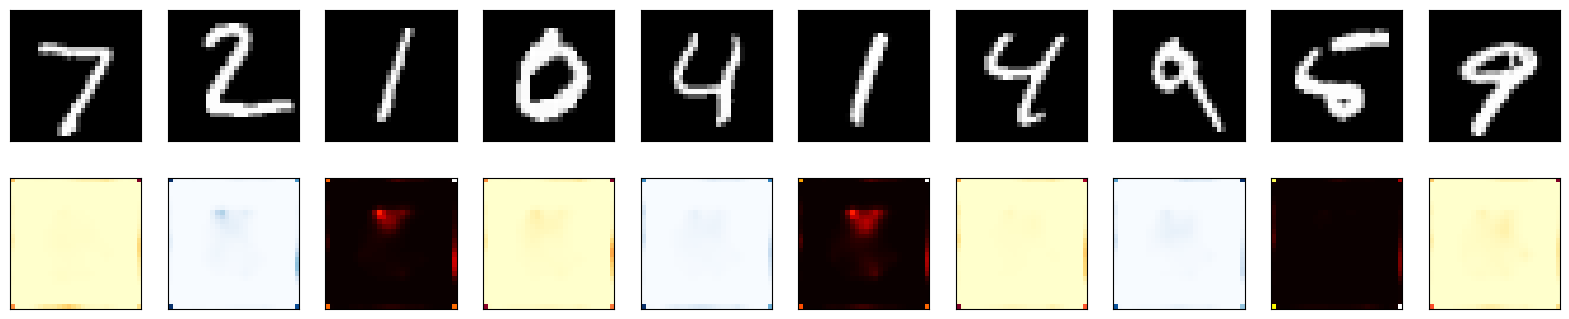

In [38]:
decoded_imgs = autoencoder.predict(x_test)

n = 10

plt.figure(figsize=(20, 4))
for i in range(n):  # Specify the number of iterations
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28), cmap='gray')  # Reshape the image correctly and set cmap to gray
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    if i % 3 == 0:
        plt.imshow(decoded_imgs[i].reshape(28, 28), cmap='YlOrRd')  # Yellow to red colormap
    elif i % 3 == 1:
        plt.imshow(decoded_imgs[i].reshape(28, 28), cmap='Blues')   # Blue colormap
    else:
        plt.imshow(decoded_imgs[i].reshape(28, 28), cmap='hot')     # Red to yellow colormap
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

plt.show()


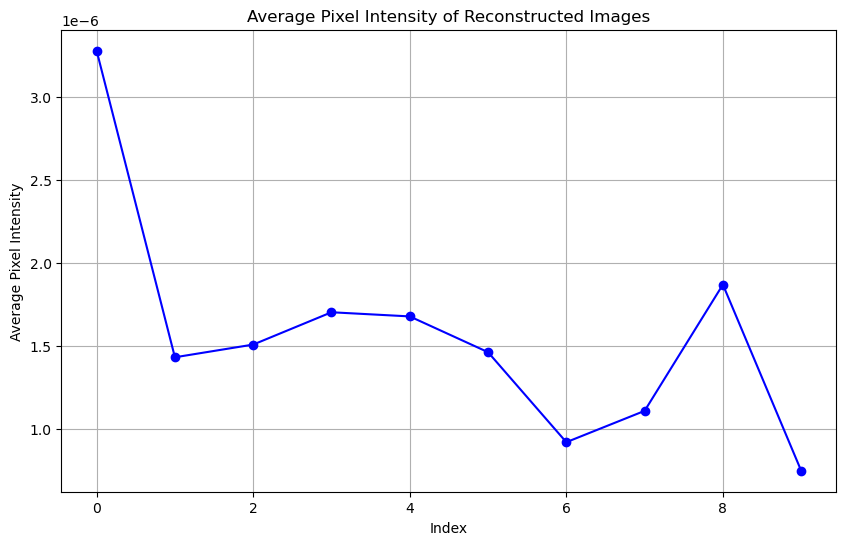

In [40]:
import numpy as np
import matplotlib.pyplot as plt

# Calculate the average pixel intensity across the reconstructed images for each index i
avg_intensity = [np.mean(decoded_imgs[i]) for i in range(n)]

# Plot the graph
plt.figure(figsize=(10, 6))
plt.plot(range(n), avg_intensity, marker='o', color='b')  # Plotting the graph
plt.xlabel('Index')  # Label for x-axis
plt.ylabel('Average Pixel Intensity')  # Label for y-axis
plt.title('Average Pixel Intensity of Reconstructed Images')  # Title for the graph
plt.grid(True)  # Enabling grid
plt.show()
